In [1]:
import sys
sys.path.insert(0, '../scripts')
import pandas as pd
import numpy as np
import seaborn as sns
import descartes
from descartes.patch import PolygonPatch

In [2]:
# Load final predictions
df = pd.read_csv("../outputs/final_predictions.csv")

In [3]:
df.head()

,Unnamed: 0,prev-yr_population_4quantiles_1.0,prev-yr_population_4quantiles_2.0,prev-yr_population_4quantiles_3.0,prev-yr_population_4quantiles_4.0,prev-yr_poverty-rate_4quantiles_1.0,prev-yr_poverty-rate_4quantiles_2.0,prev-yr_poverty-rate_4quantiles_3.0,prev-yr_poverty-rate_4quantiles_4.0,prev-yr_renter-occupied-households_4quantiles_1.0,...,renter_moved_2010-2014/2000-2009,renter_moved_2000-2009/1990-1999,renter_moved_1990-1999/1980-1989,renter_moved_1980-1989/1970-1979,renter_moved_1979/1969_earlier,state,county,tract,block group,final_predictions
0,0,1,0,0,0,0,0,1,0,0,...,98,55,0,0,0,17,31,10100,1,0.040533
1,1,0,0,1,0,0,0,0,1,0,...,425,297,39,0,6,17,31,10100,2,0.231433
2,2,0,0,0,1,0,0,0,1,0,...,542,160,14,0,0,17,31,10100,3,0.859909
3,3,0,0,0,1,0,0,0,1,0,...,175,157,22,0,0,17,31,10201,1,0.849713
4,4,0,0,0,1,0,0,0,1,0,...,656,275,33,0,0,17,31,10201,2,0.790773


In [4]:
# Add outcome label of 'upper 10th'
# Based on target variable: final predictions
col = 'final_predictions'

df['prediction_decile'] = pd.qcut(df[col].rank(method='first'), 10, labels=False)
df.loc[(df['prediction_decile'] == 9), 'upper10th'] = 1
df.loc[(df['prediction_decile'] < 9), 'upper10th'] = 0

In [5]:
df.head()

,Unnamed: 0,prev-yr_population_4quantiles_1.0,prev-yr_population_4quantiles_2.0,prev-yr_population_4quantiles_3.0,prev-yr_population_4quantiles_4.0,prev-yr_poverty-rate_4quantiles_1.0,prev-yr_poverty-rate_4quantiles_2.0,prev-yr_poverty-rate_4quantiles_3.0,prev-yr_poverty-rate_4quantiles_4.0,prev-yr_renter-occupied-households_4quantiles_1.0,...,renter_moved_1990-1999/1980-1989,renter_moved_1980-1989/1970-1979,renter_moved_1979/1969_earlier,state,county,tract,block group,final_predictions,prediction_decile,upper10th
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,17,31,10100,1,0.040533,7,0.0
1,1,0,0,1,0,0,0,0,1,0,...,39,0,6,17,31,10100,2,0.231433,8,0.0
2,2,0,0,0,1,0,0,0,1,0,...,14,0,0,17,31,10100,3,0.859909,9,1.0
3,3,0,0,0,1,0,0,0,1,0,...,22,0,0,17,31,10201,1,0.849713,9,1.0
4,4,0,0,0,1,0,0,0,1,0,...,33,0,0,17,31,10201,2,0.790773,9,1.0


In [6]:
blocks_list = df[['GEOID', 'upper10th']]
blocks_list[:20]

,GEOID,upper10th
0,170310101001,0.0
1,170310101002,0.0
2,170310101003,1.0
3,170310102011,1.0
4,170310102012,1.0
5,170310102013,0.0
6,170310102021,0.0
7,170310102022,1.0
8,170310103001,0.0
9,170310103002,0.0


In [7]:
# Export the list of block groups and recommendations
blocks_list.to_csv('../outputs/final_blocks_list.csv', index=False)

Now that we have labeled the final predictions, let's map out the blocks against Cook County boundaries

In [8]:
# Use geopandas
import geopandas as gpd
gdf = gpd.read_file('../data/raw/block-groups.geojson')
len(gdf)

9689

In [9]:
# Grab only Cook County geographies and confirm the number of blocks
gdf = gdf[gdf['pl']=='Cook County, Illinois']
len(gdf)

3992

In [10]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [11]:
# Change datatype of GEOID from object to numeric to successfully merge with df later
gdf['GEOID'] = pd.to_numeric(gdf['GEOID'])
gdf['GEOID'].dtypes

dtype('int64')

In [12]:
# Confirm that gdf is still a geodataframe
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [13]:
gdf.head()

,GEOID,west,south,east,north,n,pl,p-00,pr-00,roh-00,...,pm-16,po-16,ef-16,e-16,er-16,efr-16,lf-16,imputed-16,subbed-16,geometry
0,170310306041,-87.6567,41.9837,-87.6531,41.9855,306.04.1,"Cook County, Illinois",1349.63,30.75,782.0,...,3.93,0.0,26.0,0.0,0.00,2.85,0,0,0,"(POLYGON ((-87.655192 41.983802, -87.655914999..."
1,170310306042,-87.6553,41.9839,-87.6511,41.9881,306.04.2,"Cook County, Illinois",1219.73,16.60,263.0,...,4.17,0.0,16.0,6.0,2.82,7.51,0,0,0,(POLYGON ((-87.65111443516709 41.9840326124377...
2,170310306043,-87.6567,41.9855,-87.6552,41.9874,306.04.3,"Cook County, Illinois",898.64,27.12,534.0,...,1.21,0.0,17.0,2.0,0.41,3.47,0,0,0,"(POLYGON ((-87.656031 41.987344, -87.655303 41..."
3,170310307011,-87.6601,41.9818,-87.6559,41.9837,307.01.1,"Cook County, Illinois",1464.41,22.08,668.0,...,6.97,0.0,23.0,5.0,0.62,2.85,0,0,0,"(POLYGON ((-87.66006899999999 41.983622, -87.6..."
4,170310307021,-87.6551,41.9799,-87.6543,41.9807,307.02.1,"Cook County, Illinois",1736.21,14.31,355.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0,0,0,"(POLYGON ((-87.65454699999999 41.980646, -87.6..."


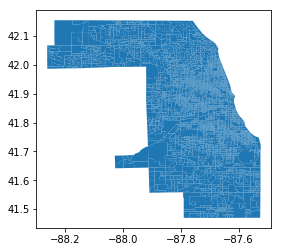

In [14]:
gdf.plot()

In [15]:
# Merge final predictions with geodataframe
final_df = gdf.merge(df, on=('GEOID'), how='left')

In [16]:
type(final_df)

geopandas.geodataframe.GeoDataFrame

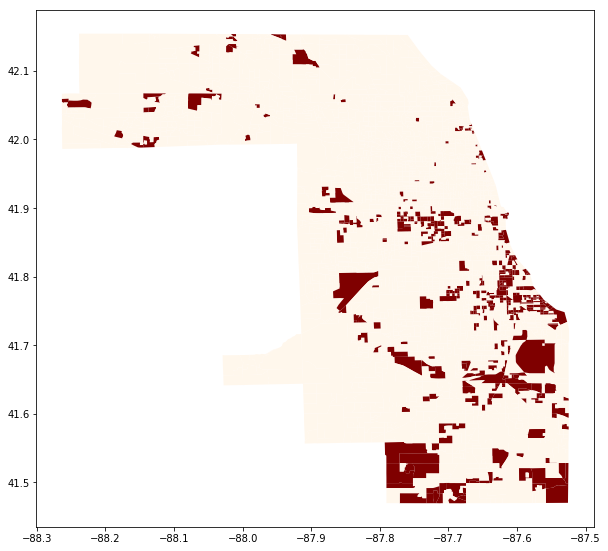

In [17]:
blocks_map = final_df.plot(column='upper10th', cmap='OrRd', figsize=(10,10))

In [18]:
# Save map to file
blocks_map.figure.savefig('../outputs/final_map.png')